# Data exploration of the CFIS-W3 lensing catalog

In this notebook, we are using the non-public data of the **full CFIS-W3 field** (50 deg^2) provided elsewhere.

In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## 1st session
Look at some basic quantities in catalogue (positions, flags, magnitude, ...)

In [2]:
# Load catalogue (numpy file)
dd_path = '/Users/tliaudat/Documents/PhD/CFIS/WL_hack_sessions/data/catalogue_CFIS_W3/final_cat.npy'

dd = np.load(dd_path)

**SExtractor denominations:**

- XWIN_WORLD: RA
- YWIN_WORLD: DEC

Shape measurement is done with ngmix: model fitting (mixture of gaussians), easy to process metacalibration with it

In [3]:
# Show column names
print(dd.dtype.names)

('XWIN_WORLD', 'YWIN_WORLD', 'TILE_ID', 'FLAGS', 'IMAFLAGS_ISO', 'NGMIX_MCAL_FLAGS', 'NGMIX_ELL_PSFo_NOSHEAR', 'GALSIM_PSF_ELL_ORIGINAL_PSF', 'SPREAD_CLASS', 'SPREAD_MODEL', 'SPREADERR_MODEL', 'N_EPOCH', 'NGMIX_N_EPOCH', 'NGMIX_ELL_1M', 'NGMIX_ELL_1P', 'NGMIX_ELL_2M', 'NGMIX_ELL_2P', 'NGMIX_ELL_NOSHEAR', 'NGMIX_ELL_ERR_NOSHEAR', 'NGMIX_FLAGS_1M', 'NGMIX_FLAGS_1P', 'NGMIX_FLAGS_2M', 'NGMIX_FLAGS_2P', 'NGMIX_FLAGS_NOSHEAR', 'NGMIX_T_1M', 'NGMIX_T_1P', 'NGMIX_T_2M', 'NGMIX_T_2P', 'NGMIX_T_NOSHEAR', 'NGMIX_T_ERR_1M', 'NGMIX_T_ERR_1P', 'NGMIX_T_ERR_2M', 'NGMIX_T_ERR_2P', 'NGMIX_T_ERR_NOSHEAR', 'NGMIX_Tpsf_1M', 'NGMIX_Tpsf_1P', 'NGMIX_Tpsf_2M', 'NGMIX_Tpsf_2P', 'NGMIX_Tpsf_NOSHEAR', 'NGMIX_FLUX_1M', 'NGMIX_FLUX_1P', 'NGMIX_FLUX_2M', 'NGMIX_FLUX_2P', 'NGMIX_FLUX_NOSHEAR', 'NGMIX_FLUX_ERR_1M', 'NGMIX_FLUX_ERR_1P', 'NGMIX_FLUX_ERR_2M', 'NGMIX_FLUX_ERR_2P', 'NGMIX_FLUX_ERR_NOSHEAR', 'GALSIM_GAL_ELL_1M', 'GALSIM_GAL_ELL_1P', 'GALSIM_GAL_ELL_2M', 'GALSIM_GAL_ELL_2P', 'GALSIM_GAL_ELL_NOSHEAR', 'GAL

How many objects do we have?

In [4]:
len(dd)

5367032

Map the distribution of objects on the sky

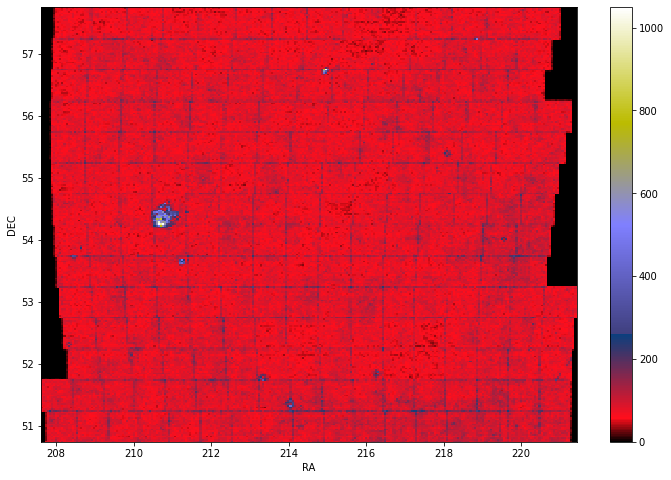

In [12]:
figure(figsize=(12,8))
hist2d(dd['XWIN_WORLD'], dd['YWIN_WORLD'], 256, cmap='gist_stern');
xlabel('RA')
ylabel('DEC')
_ = colorbar()

Apply some masking to the catalog

In [6]:
# FLAG_TILING = 0: duplicate objects due to overlapping tiles
# FLAGS != 0: masked objects (bright stars, Messier objects, chip defects, ...)
# IMAFLAGS_ISO != 0: SExtractor mask
# NGMIX_ELL_NOSHEAR = -10: invalid measurement (e.g. invalid PSF)
# NGMIX_FLAGS_NOSHEAR != 1: failed shape measurement

mask = (dd['FLAG_TILING'] == 1) & (dd['FLAGS']==0) & (dd['IMAFLAGS_ISO'] == 0) \
  & (dd['NGMIX_ELL_NOSHEAR'][:,0] > -10) \
  & (dd['NGMIX_FLAGS_NOSHEAR'] != 1)[0]



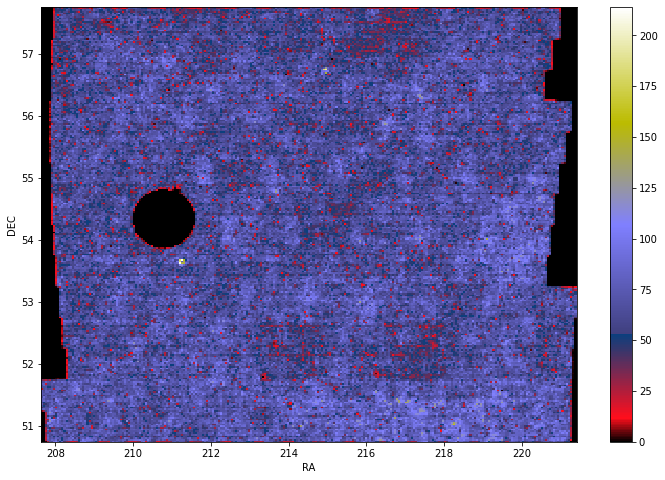

In [13]:
figure(figsize=(12,8))
hist2d(dd['XWIN_WORLD'][mask], dd['YWIN_WORLD'][mask], 256, cmap='gist_stern');
xlabel('RA')
ylabel('DEC')
_ = colorbar()

r band magnitude distribution

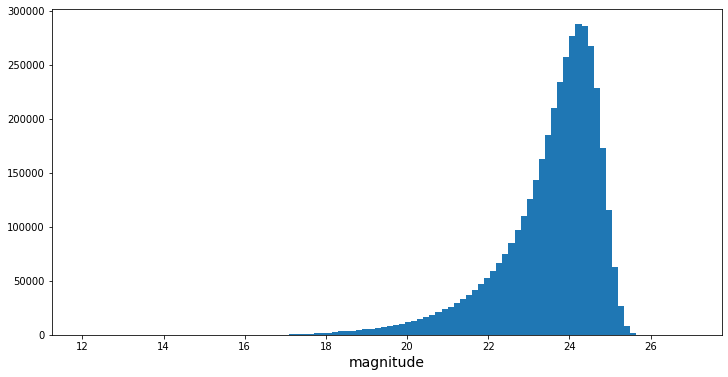

In [17]:

plt.figure(figsize=(12,6))
_ = plt.hist(dd['MAG_AUTO'][mask], range=(12, 27), bins=100)
# plt.title('Magnitude distribution')
_ = xlabel('magnitude', size=14)
plt.show()



r band SNR distribution

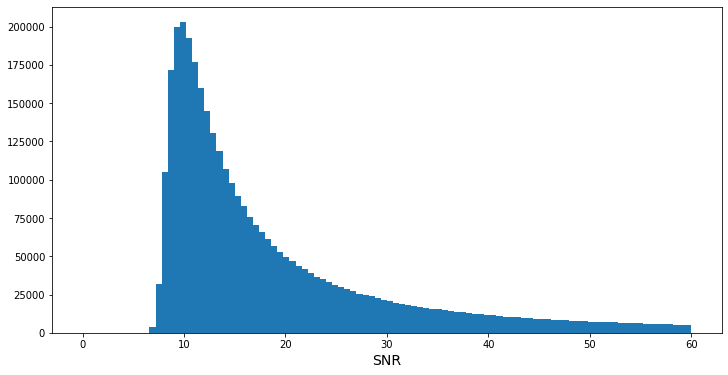

In [18]:

plt.figure(figsize=(12,6))
_ = plt.hist(dd['SNR_WIN'][mask], range=(0, 60), bins=100)
_ = xlabel('SNR', size=14)
plt.show()


Mean ellipticity

In [10]:
print(dd['NGMIX_ELL_NOSHEAR'].shape)
print('mean e1', np.mean(dd['NGMIX_ELL_NOSHEAR'][:,0][mask]))
print('mean e2', np.mean(dd['NGMIX_ELL_NOSHEAR'][:,1][mask]))

(5367032, 2)
mean e1 -0.0005714872916208202
mean e2 0.0004328348554080995


# 2nd session

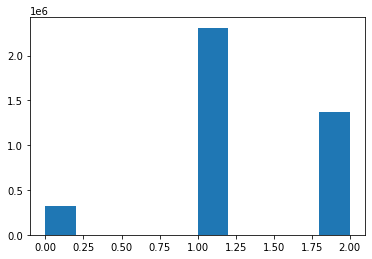

In [22]:

max(dd['SPREAD_CLASS'])


2